# 方案一

In [70]:

from pylatex.base_classes import Environment,Arguments,CommandBase
from pylatex import Document, Section, Subsection, Command,Alignat,Matrix,UnsafeCommand
from pylatex.package import Package
from pylatex.utils import italic, NoEscape
import sys

M = np.matrix([[2, 3, 4],
               [0, 0, 1],
               [0, 0, 2]])

class ExampleEnvironment(Environment):
    """
    A class representing a custom LaTeX environment.

    This class represents a custom LaTeX environment named
    ``exampleEnvironment``.
    """

    _latex_name = 'exampleEnvironment'
    escape = False
    packages = [Package('tcolorbox'),Package('amsmath')]
    
class ExampleCommand(CommandBase):
    """
    A class representing a custom LaTeX command.

    This class represents a custom LaTeX command named
    ``exampleCommand``.
    """

    _latex_name = 'exampleCommand'
    packages = [Package('color')]
    
    
# reload(sys)
# sys.setdefaultencoding('utf-8')
class AllTT(Environment):
    """A class to wrap LaTeX's alltt environment."""

    packages = [Package('alltt')]
    escape = False
    content_separator = "\n"
    
def fill_document(doc):
    """Add a section, a subsection and some text to the document.

    :param doc: the document
    :type doc: :class:`pylatex.document.Document` instance
    """
    with doc.create(Section('A section')):
        doc.append('Some regular text and some ')
        doc.append(italic('italic text. '))

        with doc.create(Subsection('A subsection')):
            doc.append('Also some crazy characters: $&#{}')


if __name__ == '__main__':
    
#     geometry_options = {
#         "includeheadfoot": True,
#         "headheight": "12pt",
#         "headsep": "10pt",
#         "landscape": True
#     }    
    geometry_options = {"tmargin": "1cm", "lmargin": "1cm"}
    doc = Document(geometry_options=geometry_options)
    # Basic document

    doc.packages.add(Package('ctex'))
    doc.preamble.append(Command('title', '123'))
#     # Add stuff to the document
    with doc.create(Section('123')):
        doc.append('测试')
        doc.append('12344')
        with doc.create(Alignat(numbering=False, escape=False)) as agn:
            agn.append(r'\frac{a}{b} &= 0 \\')
            
        with doc.create(Subsection('Alignat math environment')):
            with doc.create(Alignat(numbering=False, escape=False)) as agn:
                doc.append('test:')
                agn.append(r'\frac{a}{b} &= 0 \\')
#                 agn.extend([Matrix(M), Matrix(a), '&=', Matrix(M * a)])


    with doc.create(Section('Custom environments')):
        doc.append(NoEscape(
            r"""
            The following is a demonstration of a custom \LaTeX{}
            environment using the mdframed package.
            """))        

        # Define a style for our box
#         mdf_style_definition = UnsafeCommand('mdfdefinestyle',
#                                              arguments=['my_style',
#                                                         ('linecolor=#1,'
#                                                          'linewidth=#2,'
#                                                         'align=center,'
#                                                          'leftmargin=1cm,'
#                                                          'leftmargin=1cm')])

#         mdf_style_definition = UnsafeCommand('mdfdefinestyle',
#                                              arguments=['style',
#                                                         ()])

        # Define the new environment using the style definition above
#         new_env = UnsafeCommand('newenvironment', 'exampleEnvironment', options=2,
#                                 extra_arguments=[
#                                     mdf_style_definition.dumps() +
#                                     r'\begin{mdframed}[style=my_style]',
#                                     r'\end{mdframed}'])

        new_env = UnsafeCommand('newenvironment', 'exampleEnvironment', options=0,
                                extra_arguments=[
                                    r'\begin{tcolorbox}',
                                    r'\end{tcolorbox}'])
        doc.append(new_env)        
        
#         with doc.create(ExampleEnvironment(arguments=Arguments('red', 1))) as environment:
        with doc.create(ExampleEnvironment()) as environment:
#             with doc.create(Alignat(numbering=False, escape=False)) as agn:
            environment.append(r'Text\tcbox[tcbox raise base]{$g(x) &= \frac{1}{x}\\$}\hfil')
#             environment.append(NoEscape(r'Text\tcbox[tcbox raise base]{$g(x) &= \frac{1}{x}\\$}\hfil'))
#             environment.append(r'Text\tcbox[tcbox raise base]{$g(x) &=  \frac{1}{x}\\$}\hfil')
            doc.append(r'This formula $f(x) = x^2$ is an example')
        
#             environment.append(r'\frac{a}{b} &= 0 \\')
        
    doc.generate_pdf('basic_maketitle', clean_tex=True,compiler='xelatex')
#     tex = doc.dumps()  # The document as string in LaTeX syntax
    
    print('over')

xelatex: security risk: running with elevated privileges
This is XeTeX, Version 3.14159265-2.6-0.999992 (MiKTeX 2.9.7400 64-bit)
entering extended mode
(basic_maketitle.tex
LaTeX2e <2020-02-02> patch level 5
L3 programming layer <2020-04-06>
("E:\Program Files\MiKTeX 2.9\tex/latex/base\article.cls"
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
("E:\Program Files\MiKTeX 2.9\tex/latex/base\size10.clo"))
("E:\Program Files\MiKTeX 2.9\tex/latex/base\fontenc.sty"
("E:\Program Files\MiKTeX 2.9\tex/latex/lm\t1lmr.fd"))
("E:\Program Files\MiKTeX 2.9\tex/latex/base\inputenc.sty"

Package inputenc Warning: inputenc package ignored with utf8 based engines.

) ("E:\Program Files\MiKTeX 2.9\tex/latex/lm\lmodern.sty")
("E:\Program Files\MiKTeX 2.9\tex/latex/base\textcomp.sty")
("E:\Program Files\MiKTeX 2.9\tex/latex/lastpage\lastpage.sty")
("E:\Program Files\MiKTeX 2.9\tex/latex/geometry\geometry.sty"
("E:\Program Files\MiKTeX 2.9\tex/latex/graphics\keyval.sty")
("E:\Program

limit_output extension: Maximum message size of 10000 exceeded with 26816 characters

CalledProcessError: Command '['xelatex', '--interaction=nonstopmode', 'basic_maketitle.tex']' returned non-zero exit status 1.

# 方案二

## 生成带底色的PDF文件 

In [12]:
from pylatex.base_classes import Environment, CommandBase, Arguments
from pylatex.package import Package
from pylatex import Document, Section, UnsafeCommand
from pylatex.utils import NoEscape


# Create a new document
doc = Document()
doc.packages.add(Package('ctex'))
doc.packages.add(Package('color'))
doc.packages.add(Package('xcolor'))
doc.packages.add(Package('graphicx'))
# with doc.create(Section('Custom commands')):
#     doc.append(NoEscape(
#         r"""
#         The following is a demonstration of a custom \LaTeX{}
#         command with a couple of parameters.
#         """))
doc.append(NoEscape(r'''\fboxrule=2pt'''))
with doc.create(Section('Custom environments')):
    doc.append(NoEscape(
        r"""
        一、选择题
            1．下列关于金属利用的说法错误的是 （ ）
                A．用铝制高压电线 \colorbox{red}{$f(x) = x^2$}
                B．用钨制灯丝
                C．用纯铁制机床底座 \colorbox{red}{$\frac{9}{3}+{2}$}
                D．用铝粉制防锈漆
            2．下列物质不属于合金的是 （ ） A．青铜 B．铝 C．钢 D．生铁
            3．在金属表面覆盖保护膜是普遍采用的金属防锈措施之一。下列自行车的防锈措施中，不属于覆盖保护膜的是 （ ） 
                A．擦拭保持洁净与干燥       B．链条上油   C．轮圈镀铬 D．车架喷漆 4．早在春秋战国时期，我国就开始生产和
        """))
    
    doc.append(NoEscape(
        r"""
        \textcolor{black}{测试试题} \colorbox{red}{is} \textcolor{black}{a demonstration of a custom} \colorbox{red}{$f(x) = x^2$}
        environment using \fcolorbox{blue}{blue}{\includegraphics[scale=0.05]{D:/PROJECT_TW/git/data/mathdetect/picture/3.png}} the mdframed package.\colorbox{red}{$\frac{9}{3}+{2}$}
        """)) 
    
    doc.append(NoEscape(
        r'''\begin{figure}[ht] \centering \fcolorbox{blue}{blue}{\includegraphics[scale=0.2]{D:/PROJECT_TW/git/data/mathdetect/picture/3.png}} \end{figure}'''
    ))
     

doc.generate_pdf('own_commands_ex',clean_tex=True,compiler='xelatex')

print('gen over')

gen over


## 解析PDF文件，读取带底色文字位置

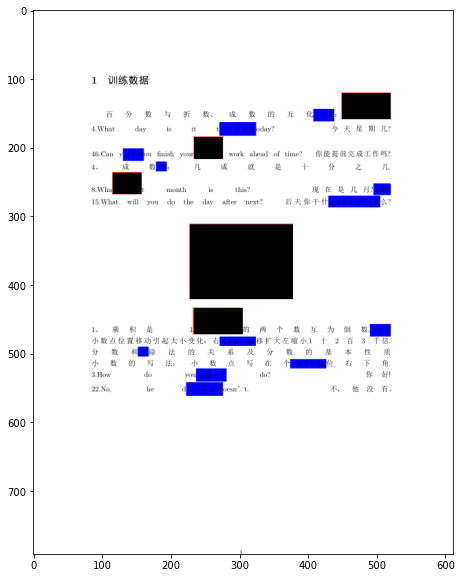

In [3]:
from lib.im2latex.pdfutils import pdf_convert_image
import cv2
import numpy as np
from matplotlib import pyplot as plt 
fig = plt.figure(figsize=(12,10))
pdf_file = 'D:\\PROJECT_TW\\git\\data\\mathdetect\\pdf\\1_color.pdf'
with open(pdf_file, 'rb') as f:
    data=f.read()
image, words = pdf_convert_image(data)
# print(words)
image = cv2.imdecode(np.frombuffer(image, np.uint8),cv2.IMREAD_COLOR)

# boundaries = [[0, 0, 255], [0, 0, 255]] # 红色
boundaries = [[255, 0, 0], [255, 0, 0]] # 蓝色

lower = np.array(boundaries[0], dtype="uint8")
upper = np.array(boundaries[1], dtype="uint8")
mask = cv2.inRange(image, lower, upper)
output = cv2.bitwise_and(image, image, mask=mask)
gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for cnt in contours:
#     print(cv2.contourArea(cnt))
    x,y,w,h = cv2.boundingRect(cnt)
#     print(x,y,w,h)
    cv2.rectangle(image,(x,y),(x+w,y+h),0,-1)
    
# print(mask)
# print(len(np.where(image==0)[0]))
# image[np.where(image==0)[0]] = 255
# 图片灰度、二值化
# image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# image[np.where(image==0)[0]] = 255
# print(len(np.where(image==0)[0]))
plt.imshow(image)
plt.show()